## Кейс 2. Создание прогнозной модели для мобильного приложения: предсказание оценки пользователя (от 1 до 5) мобильному приложению</font>

**Компания**: пенсионный фонд, предоставляющий клиентам цифровые сервисы для управления пенсионными накоплениями.

**Продукт**: мобильное приложение фонда, которое позволяет пользователям получать персональную информацию, оформлять услуги и отслеживать пенсионные выплаты. Задача решается в рамках цифровой трансформации фонда, направленной на повышение удобства и удовлетворенности граждан при взаимодействии с госуслугами.

**Проблема продукта** Несмотря на рост цифровизации, часть пользователей остается недовольной функциональностью или стабильностью приложения, что приводит к низким оценкам и жалобам. Это мешает фонду объективно оценивать качество предоставляемых электронных услуг и снижает доверие к цифровой инфраструктуре.

**Необходимо:**

1. Изучить датасет, провести EDA, предоставить бизнес-заказчикам практические инсайты, поддерживающие принятие решений на основе данных.

2. Сформулировать аналитические выводы для ML-отдела для последующей разработки модели, прогнозирующей прибыльность рекламного показа.

3. Подготовить дашборд, который содержит графики и визуализации, отражающие ключевые выводы анализа данных. Он должен демонстрировать выявленные закономерности и инсайты, быть понятным для пользователей без технической подготовки и служить инструментом для принятия решений на основе данных.

4. Подготовить все артефакты работы и презентацию с решения:
    - Ноутбук .ipynb с расчетами и визуализациями инсайтов.
    - Дашборд на платформе gradio.app.
    - Презентацию для защиты решения (.pdf).
---

## 1. Загружаем и изучаем датасет, проводим EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
# Загружаем датасет
app_survey = pd.read_csv('app_survey.csv')

Колонки данных в датасете:

user_id — id пользователя;

survey_creation_dt — дата создания опроса;

survey_response_dt — дата ответа на опрос;

language — язык пользователя;

age — возраст пользователя;

gender — пол пользователя;

tenure_years — стаж пользователя в годах;

user_income — доход пользователя;

csat_level — оценка пользователя.

In [4]:
print("Первые 5 строк:")
app_survey.head()

Первые 5 строк:


,user_id,survey_creation_dt,survey_response_dt,csat_level,language,age,gender,tenure_years,user_income
0,user_00000,2025-04-28 16:01:51,2025-05-07 03:24:28,1,RU,35-44,M,21.105392,10000-25000
1,user_00001,2025-04-25 03:02:23,2025-04-29 13:12:29,5,RU,35-44,M,21.129793,68000-100000
2,user_00002,2025-04-30 11:02:14,2025-04-20 21:09:01,5,RU,45-54,M,21.098074,NaN
3,user_00003,2025-04-25 09:32:18,2025-04-26 19:51:12,5,RU,45-54,M,21.115544,25000-44000
4,user_00004,2025-04-30 08:32:06,2025-05-01 18:33:35,5,RU,45-54,M,21.127961,44000-68000


---
**Определяем тип данных, ищем дубли и проверяем датасет на пропуски**

In [5]:
print("Размер датасета:", app_survey.shape)
print("\nТипы данных признаков:")
app_survey.info()

print("\nКоличество пропусков в данных:")
print(app_survey.isnull().sum())

Размер датасета: (42387, 9)

Типы данных признаков:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42387 entries, 0 to 42386
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             42387 non-null  object 
 1   survey_creation_dt  42387 non-null  object 
 2   survey_response_dt  42387 non-null  object 
 3   csat_level          42387 non-null  int64  
 4   language            35561 non-null  object 
 5   age                 40939 non-null  object 
 6   gender              42387 non-null  object 
 7   tenure_years        42387 non-null  float64
 8   user_income         32013 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.9+ MB

Количество пропусков в данных:
user_id                   0
survey_creation_dt        0
survey_response_dt        0
csat_level                0
language               6826
age                    1448
gender                    0
tenure_year

In [6]:
# преобразуем колонки с датой к типу datetime
app_survey["survey_creation_dt"] = pd.to_datetime(app_survey["survey_creation_dt"])
app_survey["survey_response_dt"] = pd.to_datetime(app_survey["survey_response_dt"])
app_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42387 entries, 0 to 42386
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             42387 non-null  object        
 1   survey_creation_dt  42387 non-null  datetime64[ns]
 2   survey_response_dt  42387 non-null  datetime64[ns]
 3   csat_level          42387 non-null  int64         
 4   language            35561 non-null  object        
 5   age                 40939 non-null  object        
 6   gender              42387 non-null  object        
 7   tenure_years        42387 non-null  float64       
 8   user_income         32013 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 2.9+ MB


In [7]:
print("Статистика по  столбцам:")
app_survey.describe(include='all')

Статистика по  столбцам:


,user_id,survey_creation_dt,survey_response_dt,csat_level,language,age,gender,tenure_years,user_income
count,42387,42387,42387,42387.000000,35561,40939,42387,42387.000000,32013
unique,40065,NaN,NaN,NaN,1,5,2,NaN,6
top,user_29032,NaN,NaN,NaN,RU,35-44,M,NaN,10000-25000
freq,5,NaN,NaN,NaN,35561,11835,32413,NaN,18354
mean,NaN,2025-05-05 11:25:42.951258624,2025-05-06 22:08:36.103427840,4.102767,NaN,NaN,NaN,9.801147,NaN
min,NaN,2025-04-12 04:07:31,2025-04-12 14:33:44,1.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,2025-04-28 08:03:24.500000,2025-04-29 13:08:38,4.000000,NaN,NaN,NaN,2.132807,NaN
50%,NaN,2025-05-05 13:34:30,2025-05-07 00:34:37,5.000000,NaN,NaN,NaN,9.308819,NaN
75%,NaN,2025-05-12 14:32:13.500000,2025-05-14 10:38:36,5.000000,NaN,NaN,NaN,16.941052,NaN
max,NaN,2025-05-27 15:01:24,2025-05-30 04:08:12,5.000000,NaN,NaN,NaN,21.195642,NaN


**В следующих колонках обнаружены пропуски:**
- language: 6826 пропусков из 42387 значений

- age: 1448 пропусков из 42387 значений

- user_income: 10374 пропусков из 42387 значений

**В колонке user_id обнаружено 2 322 дубликата**

Это может свидетельствовать о том, что:
- Некоторые пользователи оценили приложение как минимум дважды

- В приложении произошел сбой и появилась фиктивная запись об оценке, которую пользователь не ставил

---
**Проверяем распределение данных по признакам**

In [8]:
# Категориальные признаки
categorical_cols = ['language', 'gender']
for col in categorical_cols:
    print(f"\nКоличество значений в {col}:")
    print(app_survey[col].value_counts())


Количество значений в language:
language
RU    35561
Name: count, dtype: int64

Количество значений в gender:
gender
M    32413
F     9974
Name: count, dtype: int64


In [9]:
# Заполняем пропущенные значения в колонке language значением Неизвестно
app_survey['language'] = app_survey['language'].fillna('Неизвестно')

# Заполняем пропущенные значения в колонке age значением Неизвестно
app_survey['age'] = app_survey['age'].fillna('Неизвестно')

# Заполняем пропущенные значения в колонке user_income значением Неизвестно
app_survey['user_income'] = app_survey['user_income'].fillna('Неизвестно')

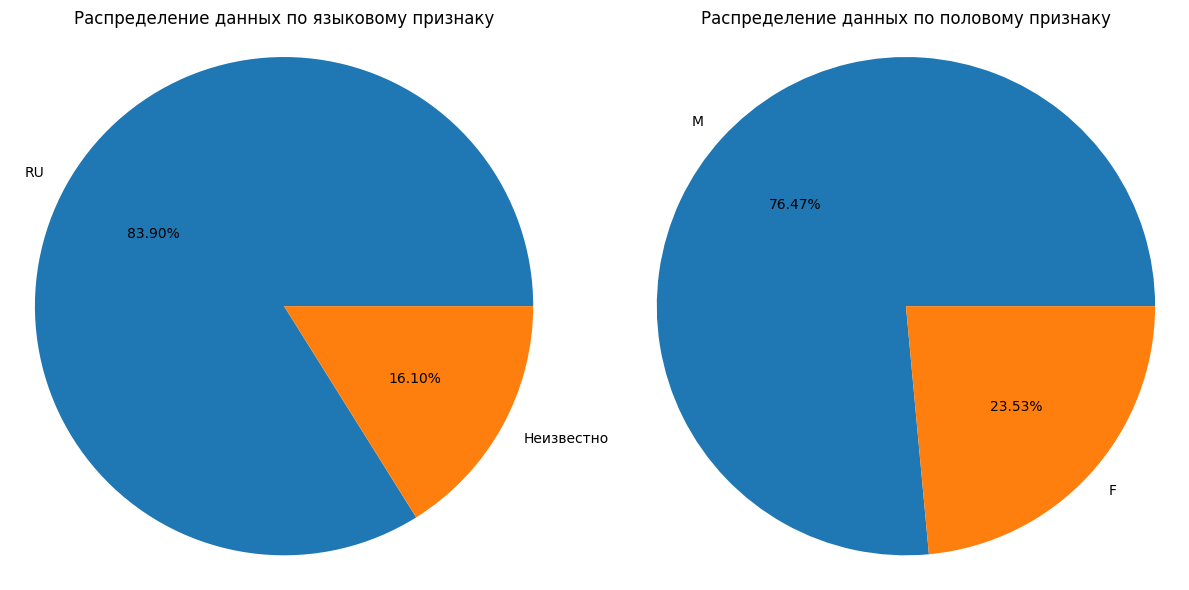

In [10]:
# Строим график распределения данных по языковому признаку
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

language_counts = app_survey['language'].value_counts()
axes[0].pie(language_counts, labels=language_counts.index, autopct='%1.2f%%')
axes[0].set_title('Распределение данных по языковому признаку')
axes[0].axis('equal')

# Строим график распределения данных по половому признаку
gender_counts = app_survey['gender'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%')
axes[1].set_title('Распределение данных по половому признаку')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

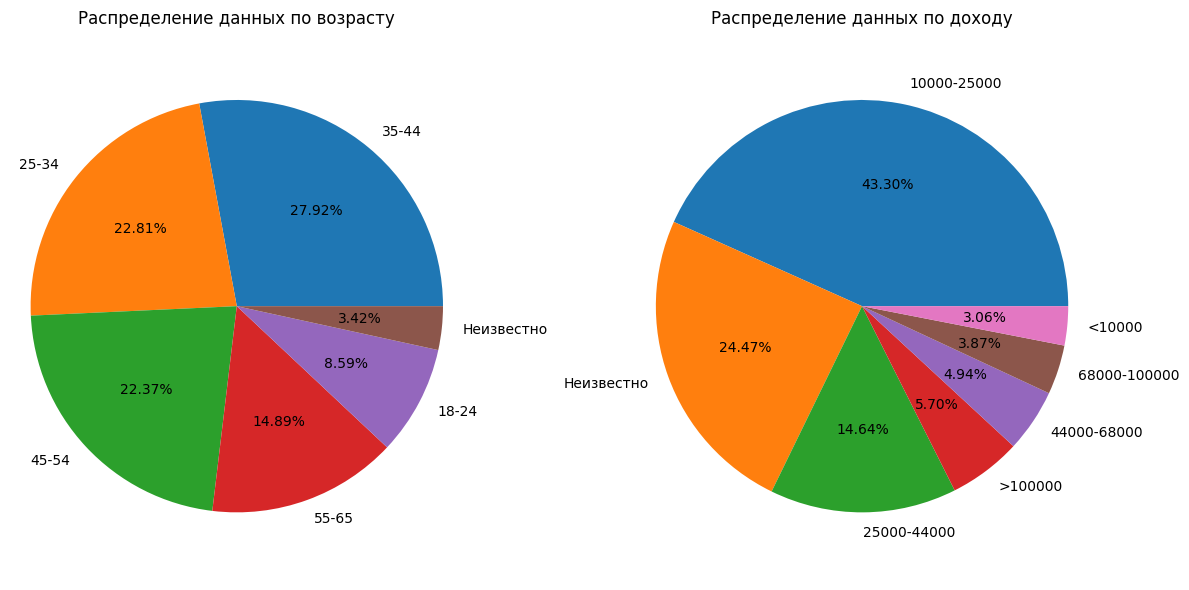

In [11]:
# Строим график распределения данных по возрасту и доходу
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

age_counts = app_survey['age'].value_counts()
axes[0].pie(age_counts, labels=age_counts.index, autopct='%1.2f%%')
axes[0].set_title('Распределение данных по возрасту')
axes[0].axis('equal')

# Строим график распределения данных по доходу
income_counts = app_survey['user_income'].value_counts()
axes[1].pie(income_counts, labels=income_counts.index, autopct='%1.2f%%')
axes[1].set_title('Распределение данных по доходу')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

Распределение оценок:
csat_level
1     6732
2     1187
3     2175
4     3192
5    29101
Name: count, dtype: int64


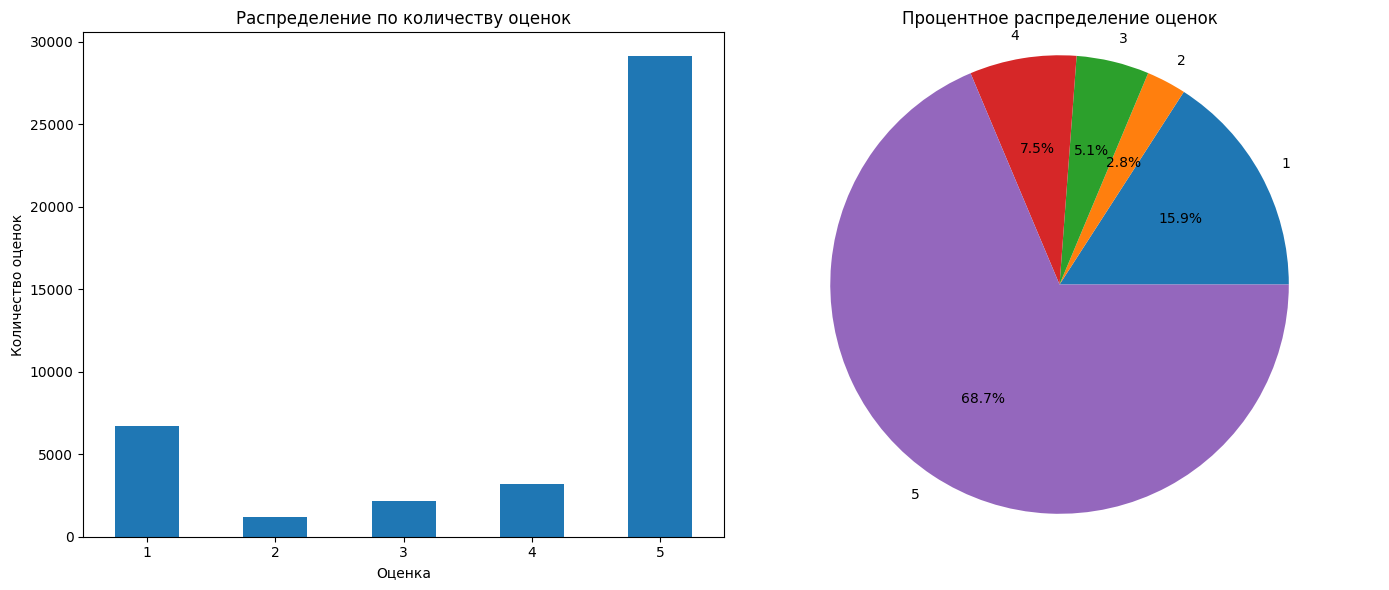

In [12]:
# Распределение значений csat_level по оценкам (1-5)
print("Распределение оценок:")
print(app_survey['csat_level'].value_counts().sort_index())

# Строим график
csat_counts = app_survey['csat_level'].value_counts().sort_index()
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма
csat_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Распределение по количеству оценок')
axes[0].set_xlabel('Оценка')
axes[0].set_ylabel('Количество оценок')
axes[0].tick_params(axis='x', rotation=0)

# Круговая
axes[1].pie(csat_counts, labels=csat_counts.index, autopct='%1.1f%%')
axes[1].set_title('Процентное распределение оценок')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

**Распределение данных:**
- Сильное смещение в сторону пользователей-мужчин: 76.47% против 23.53%

- Распределение по возрасту почти равномерное для трех групп (25-34, 35-44 и 45-54)

- Распределение по доходу имеет явное смещение в сторону групппы с доходом 10000-25000. А также высокая доля пользователей имеет пропущенные значения в графе доход (четверть от общего числа)

- Распределение оценок сильно смещено в сторону оценки 5 (68.7% от общего количества оценок)

---
**Считаем средние оценки по различным группам**

In [13]:
# Средняя оценка по полу
print("Средняя оценка по полу:")
print(app_survey.groupby('gender')['csat_level'].mean())

Средняя оценка по полу:
gender
F    4.050732
M    4.118780
Name: csat_level, dtype: float64


In [14]:
# Средняя оценка по языку пользователя
print("Средняя оценка по языку пользователя:")
print(app_survey.groupby('language')['csat_level'].mean())

Средняя оценка по языку пользователя:
language
RU            4.084137
Неизвестно    4.199824
Name: csat_level, dtype: float64


In [15]:
# Корреляция между оценкой и стажем пользователя
print("Корреляция между оценкой и стажем пользователя:")
print(app_survey[['tenure_years', 'csat_level']].corr())

Корреляция между оценкой и стажем пользователя:
              tenure_years  csat_level
tenure_years      1.000000    0.010849
csat_level        0.010849    1.000000


Средняя оценка по возрастным группам:
age
18-24         3.914011
25-34         4.028131
35-44         4.144825
45-54         4.148476
55-65         4.172370
Неизвестно    4.129144
Name: csat_level, dtype: float64


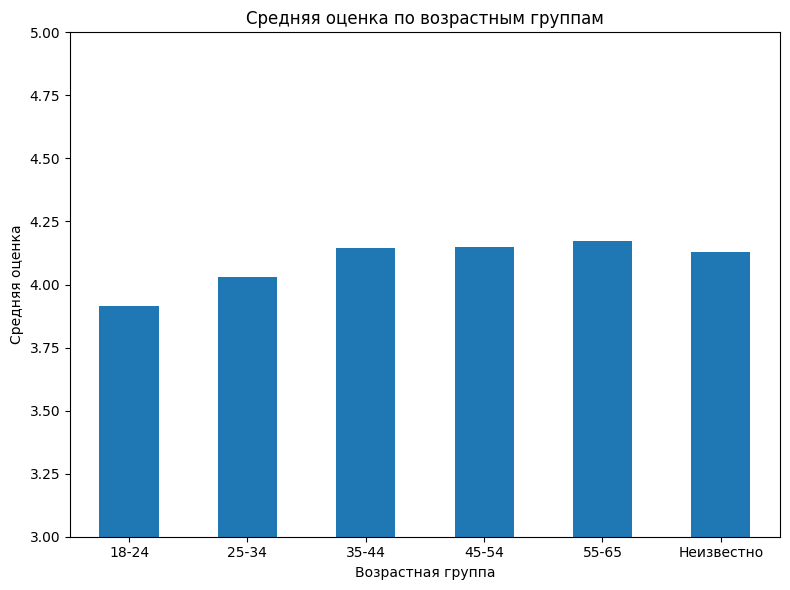

In [16]:
# Средняя оценка по возрастным группам
print("Средняя оценка по возрастным группам:")
print(app_survey.groupby('age')['csat_level'].mean().sort_index())

# Строим график
csat_counts = app_survey.groupby('age')['csat_level'].mean().sort_index()
plt.figure(figsize=(8, 6))
csat_counts.plot(kind='bar')
plt.title('Средняя оценка по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=0)
plt.ylim(3, 5)

plt.tight_layout()
plt.show()

Средняя оценка по доходу:
user_income
<10000          4.220169
10000-25000     4.239348
25000-44000     4.200290
44000-68000     3.952745
68000-100000    3.879951
>100000         3.921009
Неизвестно      3.895990
Name: csat_level, dtype: float64


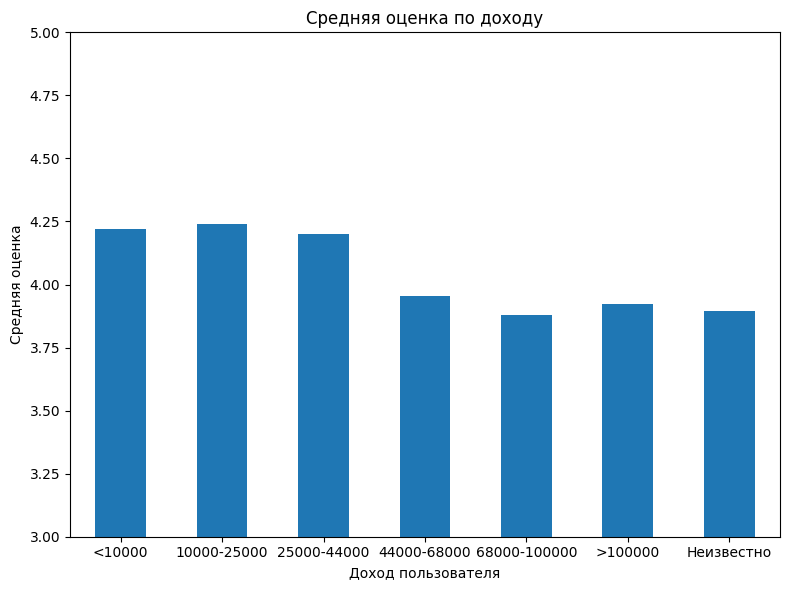

In [17]:
# Средняя оценка по доходу
csat_mean = app_survey.groupby('user_income')['csat_level'].mean()
income_order = ['<10000', '10000-25000', '25000-44000', '44000-68000', '68000-100000', '>100000', 'Неизвестно']
csat_mean = csat_mean.reindex(income_order)

print("Средняя оценка по доходу:")
print(csat_mean)

# Строим график
plt.figure(figsize=(8, 6))
csat_mean.plot(kind='bar')
plt.title('Средняя оценка по доходу')
plt.xlabel('Доход пользователя')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=0)
plt.ylim(3, 5)

plt.tight_layout()
plt.show()

**Результаты распределения оценок по различным группам:**

- Различие оценок по половому признаку в среднем незначительно: 4.05 у женщин против 4.11 у мужчин

- Корреляция между оценкой и стажем пользователя очень низкая: 0.01

- Наиболее низкие оценки ставят пользователи из младшей возрастной группы (18 - 24)

- Наиболее низкие оценки ставят пользователи с большими доходами (> 68 000), а также с неизвестным доходом

---
# 2. Построение гипотез

---
**Проверяем, есть ли связь между наличием дубликатов в user_id и низкими оценками**
- H0 (нулевая гипотеза): Наличие дубликатов (пользователь ответил несколько раз) не связано с низкими оценками

- H1 (альтернативная гипотеза): Есть статистически значимая связь между дубликатами и низкими оценками

In [22]:
# 1. Создаем признак 'есть дубликаты'
app_survey['has_duplicates'] = app_survey.duplicated('user_id', keep=False).astype(int)

app_survey['low_rating'] = (app_survey['csat_level'] <= 3).astype(int)

# 2. Оставляем по одному наблюдению на пользователя
unique_users = app_survey.drop_duplicates('user_id', keep='first').copy()

# 3. Проверяем, связаны ли дубликаты с низкими оценками
contingency_table = pd.crosstab(unique_users['has_duplicates'], unique_users['low_rating'])
print(contingency_table)

# Применяем статистический тест хи-квадрат
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi^2 = {chi2:.4f}")
print(f"P-value = {p:.10f}")
print(f"Статистически значимо: {p < 0.05}")

low_rating          0     1
has_duplicates             
0               29353  8663
1                1405   644

Chi^2 = 80.9403
P-value = 0.0000000000
Статистически значимо: True


In [23]:
no_dubl = 8663*100/(29353 + 8663)
has_dubl = 644*100/(1405 + 644)

print(f"Доля пользователей проголосовавших один раз и поставивших низкую оценку: {no_dubl:.1f}%")
print(f"\nДоля пользователей проголосовавших более одного раза и поставивших низкую оценку: {has_dubl:.1f}%")

Доля пользователей проголосовавших один раз и поставивших низкую оценку: 22.8%

Доля пользователей проголосовавших более одного раза и поставивших низкую оценку: 31.4%


**Выводы:**

1. Каждый третий (31,4%) пользователь, поставивший оценку более одного раза, недоволен приложением

Возможные причины:

- Пользователь ставит низкую оценку > проблема не решается > пользователь ставит снова низкую оценку

- Недовольные пользователи надеются привлечь внимание к проблемам в приложении

- Пользователь сталкивается со сбоем > перезапускает приложение > снова видит опрос

---
**Проверяем, связаны ли пропуски в language, age, user_income с низкими оценками**

- H0 (нулевая гипотеза): Нет связи между двумя категориальными переменными

- H1 (альтернативная гипотеза): Есть статистически значимая связь

In [24]:
# Создаем признак 'пропуск' для каждого поля
app_survey['lang_missing'] = (app_survey['language'] == 'Неизвестно').astype(int)
app_survey['age_missing'] = (app_survey['age'] == 'Неизвестно').astype(int)
app_survey['income_missing'] = (app_survey['user_income'] == 'Неизвестно').astype(int)


In [25]:
# Функция для теста хи-квадрат
def chi_square_test(df, missing_col, target_col='low_rating'):
    """
    Функция для применения статистического теста хи-квадрат

    Args:
        df (pd.DataFrame): Датасет с данными для теста ХИ-квадрат
        missing_col (str): Признак для которого проверяем пропуски
        target_col (str, optional): Целевой признак. По-умолчанию - 'low_rating'.

    Returns:
        tuple: Кортеж со значениями хи-квадрат и p-value
    """
    contingency_table = pd.crosstab(df[missing_col], df[target_col])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return chi2, p_value

# Проверяем каждый признак
results = {}
for col in ['lang_missing', 'age_missing', 'income_missing']:
    # Применяем хи-тест
    chi2, p = chi_square_test(app_survey, col)
    results[col] = {'chi2': chi2, 'p_value': p, 'значимость': p < 0.05}
    
    print(f"\nРезультат для пропусков в {col}")
    print(f"Chi^2 = {chi2:.4f}")
    print(f"P-value = {p:.10f}")
    print(f"Статистически значимо: {p < 0.05}")


Результат для пропусков в lang_missing
Chi^2 = 39.2870
P-value = 0.0000000004
Статистически значимо: True

Результат для пропусков в age_missing
Chi^2 = 1.0504
P-value = 0.3054201571
Статистически значимо: False

Результат для пропусков в income_missing
Chi^2 = 229.4009
P-value = 0.0000000000
Статистически значимо: True


**Выводы:**

1. Пользователи, у которых не указан язык, статистически значимо чаще ставят низкие оценки (1-3 балла)

Возможные причины:

- Технические сбои при определении языка могут быть связаны со сбоями в работе приложения, что приводит к недовольству пользователя

- Может быть связано с тем, что эти пользователи используют нестандартные браузеры/устройства
2. Пропуск возраста не связан с низкими оценками
Возможные причины:

- Пропуск возраста равномерно распределен среди довольных и недовольных пользователей

- Вопрос о возрасте может восприниматься как личные данные, и его пропуск не говорит о недовольстве приложением
3. Пользователи, которые не указали доход, намного чаще ставят низкие оценки
Возможные причины:

- Технические сбои при определении дохода могут быть связаны со сбоями в работе приложения, что приводит к недовольству пользователя

- Вопрос о доходе может быть слишком личным, и недовольные приложением пользователи с меньшей вероятностью будут делиться такой информацией

- Вопрос о доходе может быть расположен в конце опроса и недовольные пользователи могут не доходить до него
